# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [4]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[8], verbose=True)

Training/Valid data shape: (232, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.37066
	Train loss: 0.04492, Accuracy: 56/185 (30.27%)
	Validation loss: 0.02952, Accuracy: 9/47 (19.15%)
	Test loss: 0.02757, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.33116
	Train loss: 0.04435, Accuracy: 58/185 (31.35%)
	Validation loss: 0.02982, Accuracy: 10/47 (21.28%)
	Test loss: 0.02784, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.28972
	Train loss: 0.04365, Accuracy: 63/185 (34.05%)
	Validation loss: 0.02979, Accuracy: 12/47 (25.53%)
	Test loss: 0.02805, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.36069
	Train loss: 0.04338, Accuracy: 53/185 (28.65%)
	Validation loss: 0.03020, Accuracy: 10/47 (21.28%)
	Test loss: 0.02855, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.32371
	Train loss: 0.04310, Accuracy: 60/185 (32.43%)
	Validation loss: 0.03077, Accuracy: 11/47 (23.40%)
	Test loss: 0.0289

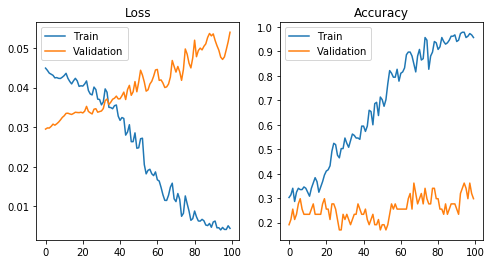

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.39311
	Train loss: 0.04494, Accuracy: 53/185 (28.65%)
	Validation loss: 0.02950, Accuracy: 10/47 (21.28%)
	Test loss: 0.02808, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.42590
	Train loss: 0.04504, Accuracy: 50/185 (27.03%)
	Validation loss: 0.02948, Accuracy: 10/47 (21.28%)
	Test loss: 0.02812, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.30702
	Train loss: 0.04483, Accuracy: 51/185 (27.57%)
	Validation loss: 0.02959, Accuracy: 10/47 (21.28%)
	Test loss: 0.02820, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.42112
	Train loss: 0.04442, Accuracy: 55/185 (29.73%)
	Validation loss: 0.02970, Accuracy: 9/47 (19.15%)
	Test loss: 0.02827, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.33533
	Train loss: 0.04350, Accuracy: 64/185 (34.59%)
	Validation loss: 0.02977, Accuracy: 10/47 (21.28%)
	Test loss: 0.0284

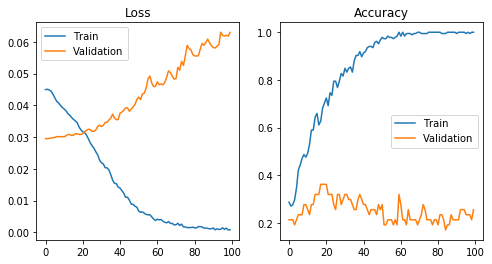

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

## GRU

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.48022
	Train loss: 0.04502, Accuracy: 46/185 (24.86%)
	Validation loss: 0.02975, Accuracy: 10/47 (21.28%)
	Test loss: 0.02748, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.35673
	Train loss: 0.04473, Accuracy: 48/185 (25.95%)
	Validation loss: 0.02959, Accuracy: 11/47 (23.40%)
	Test loss: 0.02751, Accuracy: 17/50 (34.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.30291
	Train loss: 0.04406, Accuracy: 61/185 (32.97%)
	Validation loss: 0.02939, Accuracy: 13/47 (27.66%)
	Test loss: 0.02750, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.36483
	Train loss: 0.04340, Accuracy: 74/185 (40.00%)
	Validation loss: 0.02919, Accuracy: 13/47 (27.66%)
	Test loss: 0.02761, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.28850
	Train loss: 0.04265, Accuracy: 72/185 (38.92%)
	Validation loss: 0.02908, Accuracy: 12/47 (25.53%)
	Test loss: 0.027

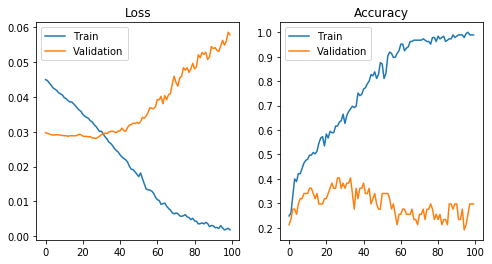

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

## CNN + LSTM

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.41154
	Train loss: 0.04506, Accuracy: 39/185 (21.08%)
	Validation loss: 0.02933, Accuracy: 17/47 (36.17%)
	Test loss: 0.02776, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.39876
	Train loss: 0.04497, Accuracy: 50/185 (27.03%)
	Validation loss: 0.02943, Accuracy: 10/47 (21.28%)
	Test loss: 0.02783, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.38898
	Train loss: 0.04490, Accuracy: 50/185 (27.03%)
	Validation loss: 0.02952, Accuracy: 10/47 (21.28%)
	Test loss: 0.02790, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.38077
	Train loss: 0.04484, Accuracy: 50/185 (27.03%)
	Validation loss: 0.02961, Accuracy: 10/47 (21.28%)
	Test loss: 0.02796, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.37390
	Train loss: 0.04475, Accuracy: 50/185 (27.03%)
	Validation loss: 0.02966, Accuracy: 10/47 (21.28%)
	Test loss: 0.027

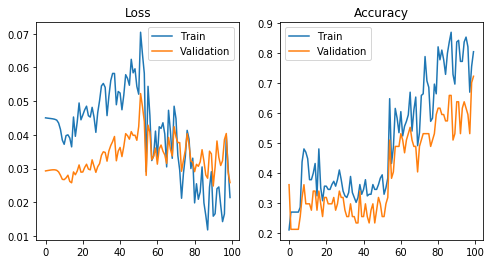

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

## CNN + GRU

Training Progress: 	Epoch 1 [0/185 (0.00%)]		Loss: 1.41233
	Train loss: 0.04502, Accuracy: 46/185 (24.86%)
	Validation loss: 0.02956, Accuracy: 10/47 (21.28%)
	Test loss: 0.02752, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 2 [0/185 (0.00%)]		Loss: 1.37574
	Train loss: 0.04484, Accuracy: 46/185 (24.86%)
	Validation loss: 0.02968, Accuracy: 10/47 (21.28%)
	Test loss: 0.02774, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 3 [0/185 (0.00%)]		Loss: 1.35831
	Train loss: 0.04468, Accuracy: 64/185 (34.59%)
	Validation loss: 0.02976, Accuracy: 12/47 (25.53%)
	Test loss: 0.02793, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 4 [0/185 (0.00%)]		Loss: 1.35637
	Train loss: 0.04449, Accuracy: 54/185 (29.19%)
	Validation loss: 0.02979, Accuracy: 13/47 (27.66%)
	Test loss: 0.02802, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/185 (0.00%)]		Loss: 1.36379
	Train loss: 0.04419, Accuracy: 60/185 (32.43%)
	Validation loss: 0.02986, Accuracy: 12/47 (25.53%)
	Test loss: 0.028

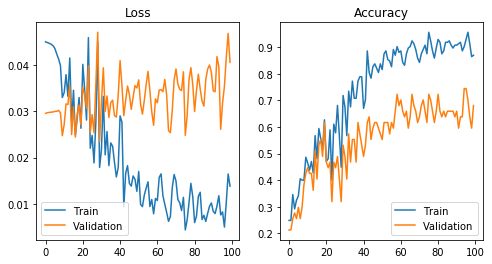

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)